* Importing Libs

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

* pandas display settings --> I am using like this because I get used to it.
* easier to visualize all columns and checking some rows.
* In here we are using 2 columns, its not needed but as I said its my habit.

In [30]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

* the whole dataset is so big and I dont need to use that much memory.

In [31]:
usecols = ["Artist Nationality", "Object Begin Date"]

* some columns are consisting of more than one data types. therefore I set low_memory to False.

In [32]:
df = pd.read_csv("/content/MetObjects.csv", usecols=usecols, low_memory = False)

In [33]:
df.columns

Index(['Artist Nationality', 'Object Begin Date'], dtype='object')

In [34]:
df.dtypes

,0
Artist Nationality,object
Object Begin Date,int64


In [35]:
df.isnull().sum()

,0
Artist Nationality,202443
Object Begin Date,0


* will be changing the missing values with Unknown.

In [37]:
df["Artist Nationality"] = df["Artist Nationality"].fillna("Unknown")

* the dataset has different data types in same columns, wanted to make this fix to avoid any errors.

In [38]:
df["Object Begin Date"] = pd.to_numeric(df["Object Begin Date"], errors="coerce")

* same reason to avoid any errors in the code flow.

In [39]:
df = df.dropna(subset=["Object Begin Date"])

* creating century column

In [40]:
df["century"] = (df["Object Begin Date"] // 100 + 1).astype(int)

* adding "th c." tag.

In [41]:
df["century_label"] = df["century"].astype(str) + "th c."

* selecting some meaningful area.

In [42]:
df = df[(df["century"] >= 10) & (df["century"] <= 21)]

* if the classes in Artist Nationality column is checked, there are different encoded classes which are meaning the same class. For example,
  * American = American|American

In [45]:
df["Artist Nationality"].value_counts()[0:10]

,count
Artist Nationality,
Unknown,117937
American,69755
,23386
French,21616
Italian,13151
British,12425
French|French,10901
American|American,10286
German,7965


* wanted to merge any classes which consist "|" because the pattern follows like this.
* if it consisting of any digits, or blank just will be putting it "Unknown".

In [46]:
def clean_nationality(x):
    if pd.isna(x) or str(x).strip() == "":
        return "Unknown"

    x = str(x).strip()
    x = x.strip("|")

    if x == "":
        return "Unknown"

    if x.isdigit():
        return "Unknown"

    parts = [p.strip() for p in x.split("|") if p.strip() != ""]

    parts = list(dict.fromkeys(parts))

    if len(parts) == 0:
        return "Unknown"
    return parts[0]

* function application

In [47]:
df["Artist Nationality"] = df["Artist Nationality"].apply(clean_nationality)

* dont need to visualize everything the dataset has.

In [48]:
top_n = 15

In [49]:
top_nationalities = (
    df["Artist Nationality"]
    .value_counts()
    .head(top_n)
    .index
)

In [50]:
df_top = df[df["Artist Nationality"].isin(top_nationalities)]

* wanted to check the functions and everything on the workflow were successful or not.

In [51]:
df_top["Artist Nationality"].value_counts()

,count
Artist Nationality,
Unknown,143050
American,93190
French,46766
Italian,25456
British,24462
German,12374
Japanese,7545
Netherlandish,5787
Dutch,4284


In [52]:
df_top.shape

(375803, 4)

In [53]:
93273/ df_top.shape[0]

0.2481965285003047

* for visualizing arist nationality, the gorupby method needed to aggregate in some level via counting.

In [54]:
pivot_nat_time = (
    df_top
    .groupby(["Artist Nationality", "century_label"])
    .size()
    .reset_index(name="count")
    .pivot(index="Artist Nationality", columns="century_label", values="count")
    .fillna(0)
)

In [55]:
pivot_nat_time

century_label,10th c.,11th c.,12th c.,13th c.,14th c.,15th c.,16th c.,17th c.,18th c.,19th c.,20th c.,21th c.
Artist Nationality,,,,,,,,,,,,
American,0.0,0.0,0.0,0.0,0.0,0.0,2.0,57.0,1583.0,38338.0,51750.0,1460.0
Austrian,0.0,0.0,0.0,0.0,0.0,21.0,24.0,64.0,299.0,502.0,1281.0,34.0
British,0.0,1.0,0.0,1.0,1.0,14.0,118.0,456.0,7121.0,13024.0,3480.0,246.0
"British, Scottish",0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,375.0,1464.0,327.0,0.0
Chinese,17.0,10.0,26.0,44.0,190.0,70.0,125.0,316.0,176.0,293.0,985.0,63.0
Dutch,0.0,0.0,0.0,0.0,0.0,27.0,91.0,3397.0,399.0,204.0,128.0,38.0
Flemish,0.0,0.0,0.0,0.0,0.0,3.0,220.0,1177.0,174.0,18.0,7.0,0.0
French,0.0,1.0,2.0,2.0,4.0,103.0,2383.0,6890.0,8764.0,20124.0,8334.0,159.0
German,0.0,0.0,0.0,4.0,4.0,849.0,3583.0,1108.0,2712.0,2048.0,1992.0,74.0


In [56]:
pivot_nat_time = pivot_nat_time.reindex(sorted(pivot_nat_time.columns, key=lambda x: int(x.split("th")[0])), axis=1)

In [57]:
pivot_nat_time

century_label,10th c.,11th c.,12th c.,13th c.,14th c.,15th c.,16th c.,17th c.,18th c.,19th c.,20th c.,21th c.
Artist Nationality,,,,,,,,,,,,
American,0.0,0.0,0.0,0.0,0.0,0.0,2.0,57.0,1583.0,38338.0,51750.0,1460.0
Austrian,0.0,0.0,0.0,0.0,0.0,21.0,24.0,64.0,299.0,502.0,1281.0,34.0
British,0.0,1.0,0.0,1.0,1.0,14.0,118.0,456.0,7121.0,13024.0,3480.0,246.0
"British, Scottish",0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,375.0,1464.0,327.0,0.0
Chinese,17.0,10.0,26.0,44.0,190.0,70.0,125.0,316.0,176.0,293.0,985.0,63.0
Dutch,0.0,0.0,0.0,0.0,0.0,27.0,91.0,3397.0,399.0,204.0,128.0,38.0
Flemish,0.0,0.0,0.0,0.0,0.0,3.0,220.0,1177.0,174.0,18.0,7.0,0.0
French,0.0,1.0,2.0,2.0,4.0,103.0,2383.0,6890.0,8764.0,20124.0,8334.0,159.0
German,0.0,0.0,0.0,4.0,4.0,849.0,3583.0,1108.0,2712.0,2048.0,1992.0,74.0


* percentage application.

In [58]:
percent_table = pivot_nat_time / pivot_nat_time.sum().sum() * 100

In [59]:
percent_table

century_label,10th c.,11th c.,12th c.,13th c.,14th c.,15th c.,16th c.,17th c.,18th c.,19th c.,20th c.,21th c.
Artist Nationality,,,,,,,,,,,,
American,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000532,0.015168,0.421231,10.201622,13.770513,0.388501
Austrian,0.000000,0.000000,0.000000,0.000000,0.000000,0.005588,0.006386,0.017030,0.079563,0.133581,0.340870,0.009047
British,0.000000,0.000266,0.000000,0.000266,0.000266,0.003725,0.031399,0.121340,1.894876,3.465646,0.926017,0.065460
"British, Scottish",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001064,0.099786,0.389566,0.087014,0.000000
Chinese,0.004524,0.002661,0.006919,0.011708,0.050558,0.018627,0.033262,0.084087,0.046833,0.077966,0.262105,0.016764
Dutch,0.000000,0.000000,0.000000,0.000000,0.000000,0.007185,0.024215,0.903931,0.106173,0.054284,0.034060,0.010112
Flemish,0.000000,0.000000,0.000000,0.000000,0.000000,0.000798,0.058541,0.313196,0.046301,0.004790,0.001863,0.000000
French,0.000000,0.000266,0.000532,0.000532,0.001064,0.027408,0.634109,1.833407,2.332073,5.354933,2.217651,0.042309
German,0.000000,0.000000,0.000000,0.001064,0.001064,0.225916,0.953425,0.294835,0.721655,0.544966,0.530065,0.019691


* didnt like the representation of the percentages.
* therefore formatted them to see 1 value after comma.

In [60]:
annot_labels = percent_table.applymap(lambda x: f"{x:.1f}%")

/tmp/ipython-input-3545985386.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_labels = percent_table.applymap(lambda x: f"{x:.1f}%")


In [61]:
annot_labels

century_label,10th c.,11th c.,12th c.,13th c.,14th c.,15th c.,16th c.,17th c.,18th c.,19th c.,20th c.,21th c.
Artist Nationality,,,,,,,,,,,,
American,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.4%,10.2%,13.8%,0.4%
Austrian,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.1%,0.3%,0.0%
British,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,1.9%,3.5%,0.9%,0.1%
"British, Scottish",0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.4%,0.1%,0.0%
Chinese,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.1%,0.0%,0.1%,0.3%,0.0%
Dutch,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.9%,0.1%,0.1%,0.0%,0.0%
Flemish,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.3%,0.0%,0.0%,0.0%,0.0%
French,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.6%,1.8%,2.3%,5.4%,2.2%,0.0%
German,0.0%,0.0%,0.0%,0.0%,0.0%,0.2%,1.0%,0.3%,0.7%,0.5%,0.5%,0.0%


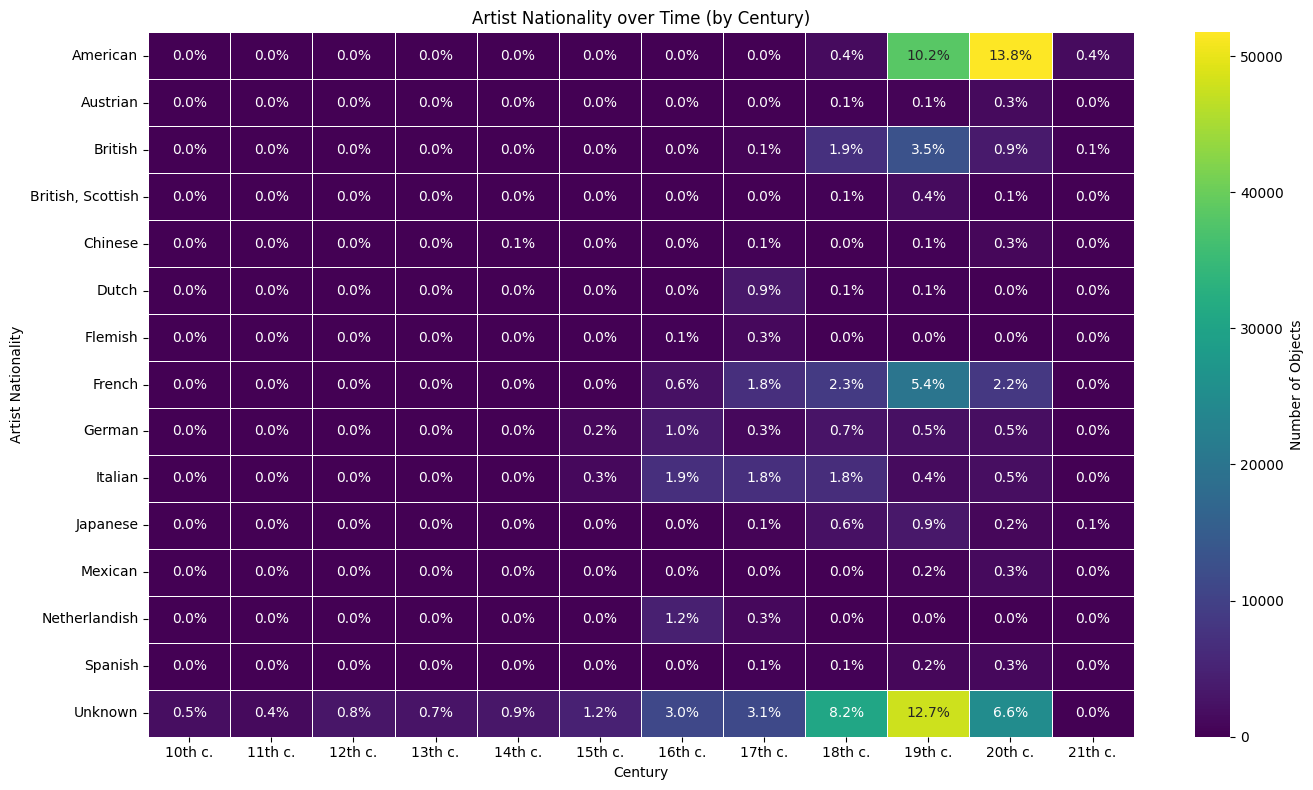

In [62]:
plt.figure(figsize=(14, 8))

sns.heatmap(
    pivot_nat_time,
    cmap="viridis",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Number of Objects"},
    annot = annot_labels,
    fmt=""
)

plt.title("Artist Nationality over Time (by Century)")

plt.xlabel("Century")
plt.ylabel("Artist Nationality")

plt.tight_layout()

plt.show()

* performed all those preprocessing and a trial heatmap to check what it will be looking like used python and  this notebook.
* now gonna save this preprocessed dataset and will be using on D3.js to only perform visualizing.

* long format conversion

In [22]:
heatmap_counts = (
    pivot_nat_time
    .stack()
    .reset_index()
)

In [23]:
heatmap_counts.columns = ["Artist_Nationality", "century_label", "count"]

In [24]:
heatmap_percents = (
    percent_table
    .stack()
    .reset_index()
)

In [25]:
heatmap_percents.columns = ["Artist_Nationality", "century_label", "percent"]

In [26]:
heatmap_df = pd.merge(
    heatmap_counts,
    heatmap_percents,
    on=["Artist_Nationality", "century_label"],
    how="left"
)

In [27]:
heatmap_df = heatmap_df.sort_values(
    by=["Artist_Nationality", "century_label"]
)

In [28]:
heatmap_df.to_csv("heatmap_data.csv", index=False)